<a href="https://colab.research.google.com/github/rijalammar1/PVCK_RijalAmmar/blob/main/Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


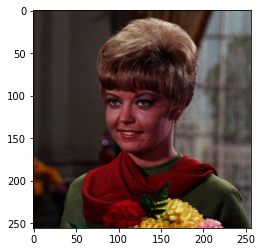

In [20]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan :50


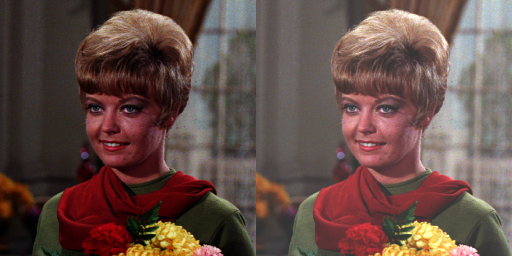

In [21]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan :'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per partikel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

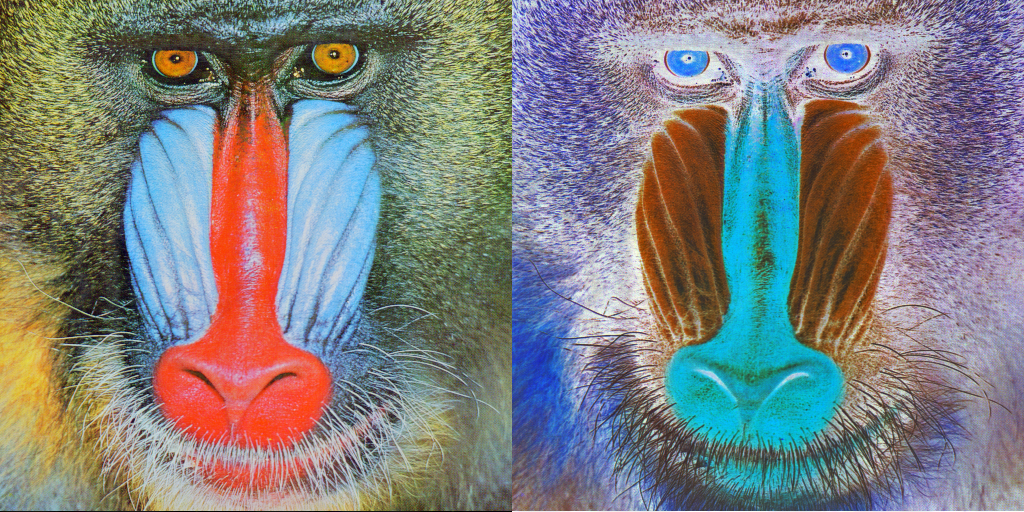

In [22]:
# Tugas 1
# Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
# terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

mandrill = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/mandrill.tiff')
mandrill_inverse = 255 - mandrill

final_frame = cv.hconcat((mandrill, mandrill_inverse))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255] : 50
Masukkan kontras [1.0 - 3.0] : 1.5


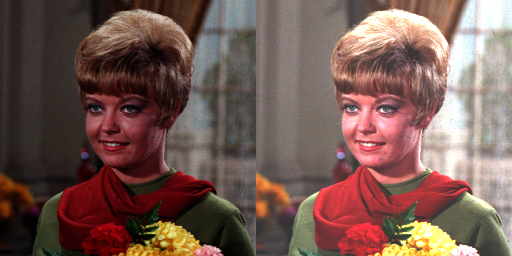

In [23]:
# Tugas 2
# Implementasikan transformasi contrast pada Google Colaboratory menggunakan
# formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
# menghasilkan keluaran seperti berikut:

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


In [24]:
# Tugas 3
# Implementasikan transformasi logarithmic brightness pada Google Colaboratory
# menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
# log, sehingga menghasilkan keluaran seperti berikut:



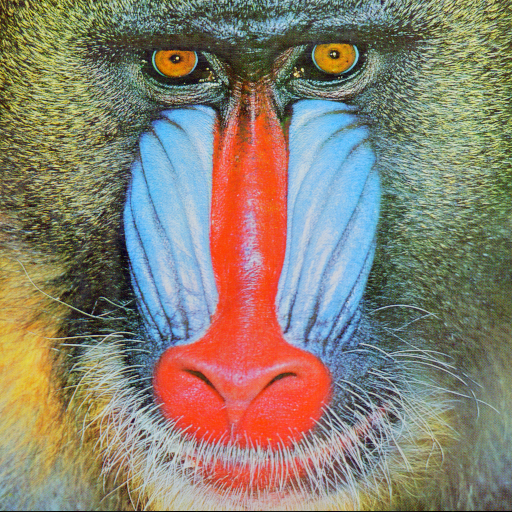

In [25]:
img2 = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
cv2_imshow(img2)

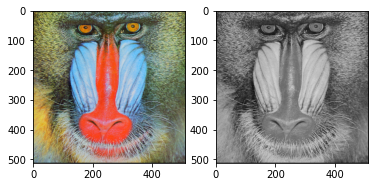

In [26]:
# Tugas 4
# Averaging

img_avg = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=10)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)


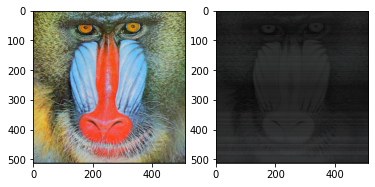

In [27]:
# Tugas 4
# Lightness

img_avg = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1, keepdims=100)/2 + np.min(img_light,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

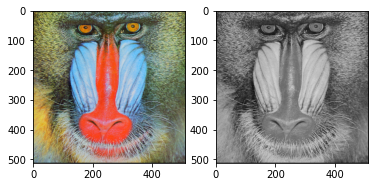

In [28]:
# Tugas 4 
# Luminance

img_avg = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/mandrill.tiff')
img_avg[:] = img2.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)


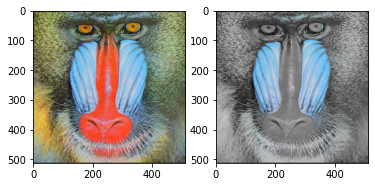

In [29]:
# Tugas 5
# Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
# tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
# biru menjadi grayscale seperti pada contoh berikut:

img_color = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/mandrill.tiff')
_, mask = cv.threshold(img_color[:,:,0], 180, 255, cv.THRESH_BINARY)
maskx = np.zeros_like(img_color)
maskx[:,:,0] = mask
maskx[:,:,1] = mask
maskx[:,:,2] = mask

blue = cv.bitwise_and(img_rgb, maskx)

gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
img_color = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
gray = cv.bitwise_and(img_color, 255 - maskx)
out = gray + blue

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')